# SYDE 556/750 --- Assignment 1
**Student ID: 00000000**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

$$J^{bias} = G^{-1}[a^{max}] - \alpha$$ 
$$J^{bias} = G^{-1}[0] - \alpha \xi$$
$$G^{-1}[a^{max}] - \alpha = G^{-1}[0] - \alpha \xi$$
$$\alpha = \frac{G^{-1}[a^{max}] -G^{-1}[0]}{1 - \xi}$$
$$J^{bias} = G^{-1}[a^{max}] - \frac{G^{-1}[a^{max}]}{1 - \xi}$$

$\text{Since G[J] = max(0, J)}$

$$\alpha = \frac{a^{max}}{1 - \xi}$$
$$J^{bias} = a^{max} - \frac{a^{max}}{1 - \xi}$$






In [2]:
def G(J):
    return np.maximum(0, J)

a_max = np.random.uniform(100, 200)
upsilon = np.random.uniform(-0.95, 0.95)



Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

In [3]:
alpha = a_max / (1- upsilon)
J_bias = a_max * upsilon / (upsilon - 1)
alpha,J_bias

(1518.9144884562695, -1370.2089215941194)

**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

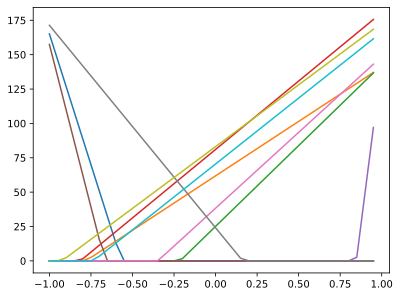

In [4]:
def plot_neurons(num_neurons):
    for i in range(num_neurons):
        # x = np.linspace(-1, 1, 40)
        x = np.arange(-1, 1, 0.05)
        a_max = np.random.uniform(100, 200)
        upsilon = np.random.uniform(-0.95, 0.95)
        e = np.random.choice([-1, 1])
        alpha = a_max / (1- upsilon)
        J_bias = a_max * upsilon / (upsilon - 1)
        a_x = G(alpha *np.dot(x,e) + J_bias)
        plt.plot(x, a_x)
    plt.show()
plot_neurons(10)

**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

In [5]:
x = np.array([np.linspace(-1, 1,40) for i in range(16)])
print(x.shape)
a_max = np.random.uniform(100, 200,16)
zeta = np.random.uniform(-0.95, 0.95,16)
e = np.random.choice([-1, 1],16)
print(e.shape)
alpha = a_max / (1- zeta)
J_bias = a_max * zeta / (zeta - 1)
encoded_x = x*e.reshape(16,1)
A_x = G(alpha.reshape(16,1)*encoded_x+ J_bias.reshape(16,1))
A_x.shape

(16, 40)
(16,)


(16, 40)

In [6]:
x = np.linspace(-1, 1,40)
a_max = np.random.uniform(100, 200,16)
zeta = np.random.uniform(-0.95, 0.95,16)
e = np.random.choice([-1, 1])
alpha = a_max / (1- zeta)
J_bias = a_max * zeta / (zeta - 1)
encoded_x = np.dot(x,e)

# outer = np.outer(encoded_x, alpha)
outer = np.outer(alpha, encoded_x)
print(outer.shape)
np.add(outer,J_bias.reshape(16,1))

   

(16, 40)


array([[ 1.87333961e+02,  1.81715006e+02,  1.76096052e+02,
         1.70477097e+02,  1.64858143e+02,  1.59239188e+02,
         1.53620234e+02,  1.48001279e+02,  1.42382325e+02,
         1.36763370e+02,  1.31144415e+02,  1.25525461e+02,
         1.19906506e+02,  1.14287552e+02,  1.08668597e+02,
         1.03049643e+02,  9.74306881e+01,  9.18117336e+01,
         8.61927790e+01,  8.05738245e+01,  7.49548699e+01,
         6.93359154e+01,  6.37169608e+01,  5.80980063e+01,
         5.24790517e+01,  4.68600972e+01,  4.12411426e+01,
         3.56221881e+01,  3.00032335e+01,  2.43842790e+01,
         1.87653244e+01,  1.31463699e+01,  7.52741530e+00,
         1.90846075e+00, -3.71049381e+00, -9.32944836e+00,
        -1.49484029e+01, -2.05673575e+01, -2.61863120e+01,
        -3.18052666e+01],
       [ 1.05154142e+02,  1.02348433e+02,  9.95427238e+01,
         9.67370149e+01,  9.39313060e+01,  9.11255970e+01,
         8.83198881e+01,  8.55141792e+01,  8.27084703e+01,
         7.99027614e+01,  7.70

In [7]:
def generate_activity(num_neurons,num_samples,firing=G):
    x = np.array([np.linspace(-1, 1,num_samples) for i in range(num_neurons)])
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.random.uniform(-0.95, 0.95,num_neurons)
    e = np.random.choice([-1, 1],num_neurons)
    alpha = a_max / (1- zeta)
    J_bias = a_max * zeta / (zeta - 1)
    encoded_x = x*e.reshape(num_neurons,1)
    A_x = firing(alpha.reshape(num_neurons,1)*encoded_x+ J_bias.reshape(num_neurons,1))
    return A_x, x[0]

A_x, X = generate_activity(16,40)
A_x.shape,X.shape

((16, 40), (40,))

In [8]:
A = np.array(A_x) # n x N array
print(A.shape)
X = np.array(X) # d x N array
print(X.shape)
def compute_decoder_no_noise(A, X,factor=0.2,add_noise=False):
    sigma = factor*np.max(A)
    noise = np.random.normal(0,factor*sigma,A.shape)
    A_noise = np.array(A)+noise if add_noise else A # n x N array
    D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T
    return D, A_noise


D, A_noise = compute_decoder_no_noise(A_x, X)
D

(16, 40)
(40,)


array([ 2.17077203e-03,  6.18229946e-04,  2.98932167e-03, -1.21811549e-04,
       -7.68069946e-04, -3.06622057e-04,  3.74550366e-04,  1.88107732e-04,
       -2.07505792e-05,  1.84426164e-04, -4.41097758e-06, -5.37494768e-03,
       -3.25116505e-04, -2.48714488e-03,  2.87376889e-03, -7.12885580e-05])

**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

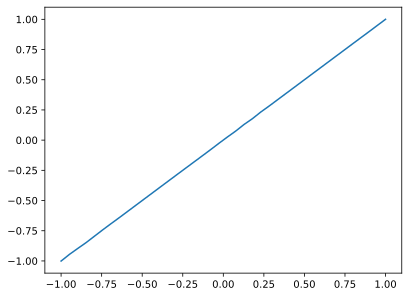

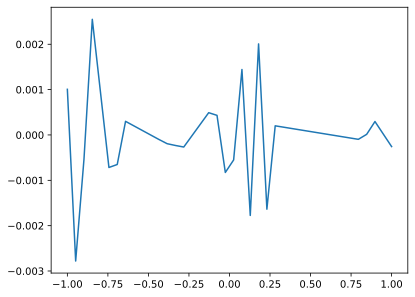

0.0008844363161806055


In [9]:
def plot_errors_and_rmse(D,A_x):
    x_hat = np.dot(D,A_x)
    plt.plot(X,x_hat)
    plt.show()
    plt.plot(X,X - x_hat)
    plt.show()
    print(np.sqrt(np.mean((X-x_hat)**2)))
plot_errors_and_rmse(D,A_x)

**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

In [10]:
def make_noisy(A_x, factor=0.2):
    sigma = factor*np.max(A_x)
    noise = np.random.normal(0,sigma,A_x.shape)
    A_noise = np.array(A_x)+noise
    return np.array(A_noise)

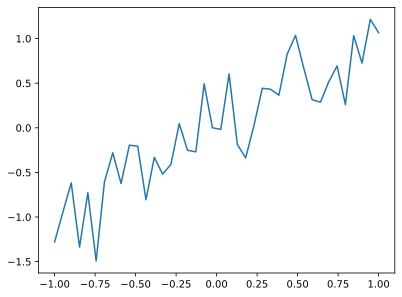

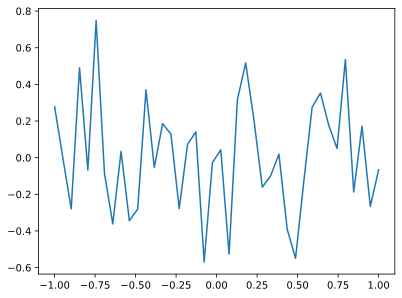

0.30698709667069535


In [11]:
sigma = 0.2*np.max(A_x)
noise = np.random.normal(0,sigma,A_x.shape)
A_noise = make_noisy(A_x) # n x N array
plot_errors_and_rmse(D,A_noise)


**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

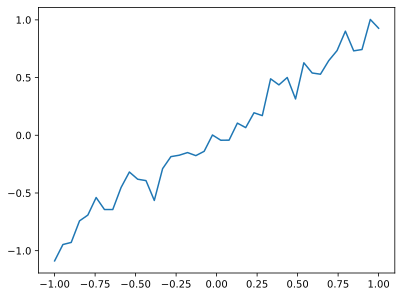

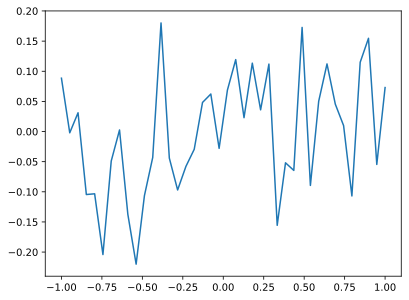

0.0998565693909892


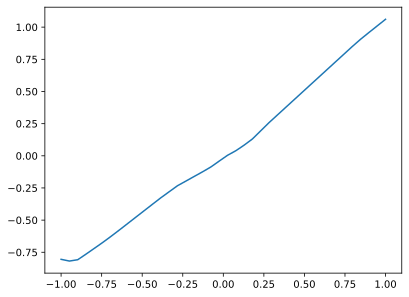

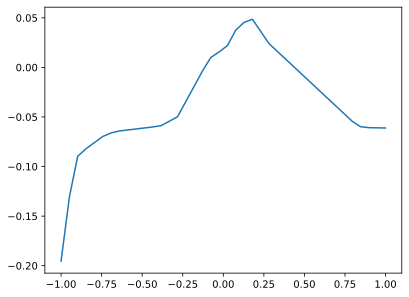

0.06056082735889529


In [12]:
def compute_decoder_noise(A,X,factor=0.2,add_noise=True): #TODO MAKE SENSE OF ADD NOISE
    A_noise = make_noisy(A) if add_noise else A # n x N array
    X = np.array(X) # d x N array
    D_account = np.linalg.lstsq(
    A_noise @ A_noise.T + 0.5 * 40 * np.square(sigma) * np.eye(A.shape[0]), A_noise @ X.T,
    rcond=None)[0].T
    return D_account, A_noise
D_noise,A_noise = compute_decoder_noise(A_x,X)
D_no_noise,A_no_noise = compute_decoder_noise(A_x,X,add_noise=False)
plot_errors_and_rmse(D_noise,A_noise)
plot_errors_and_rmse(D_noise,A_no_noise)
# plt.plot(X,x_hat)
# plt.show()
# plt.plot(X,X - x_hat)
# plt.show()
# np.sqrt(np.mean((X-x_hat)**2))

**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

|              | Noise Added     | No Noise Added |
|--------------|-----------|------------|
| Noise Accounted for | 0.0998565693909892      | 0.06056082735889529        |
| No Noise Accounted for      | 0.30698709667069535 | 0.0008844363161806055       |


When no noise is added or accounted for the RMSE is at its lowest, predictably accounting for noise when noise is added lowers the RMSE. Using a decoder optimized for noise on a set with no noise is worse than a decoder optimized on a noiselss set

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

In [13]:
A,X = generate_activity(2,40)
X.shape

(40,)

In [14]:
def e_noise(D,sigma):
    return 0.5*sigma**2*np.sum(D**2)
def e_dist(D,A_x,X):
    return 0.5*np.sum((np.dot(D,A_x)-X)**2)

def compute_error_noise(n,num_samples=40,sigma=0.1):
    A_x,X = generate_activity(n,num_samples)
    D,_ = compute_decoder_noise(A_x,X,sigma,add_noise=False)
    return  e_noise(D,sigma)
def compute_error_dist(n,num_samples=40):
    A_x,X = generate_activity(n,num_samples)
    D,_ = compute_decoder_noise(A_x,X,add_noise=False)
    return  e_dist(D,A_x,X)


def plot_noise_distortion(n,sigma=0.1,trials=5):
    errors_noise = np.array([np.average([compute_error_noise(i) for j in range(trials)]) for i in n])
    errors_dist = np.array([np.average([compute_error_dist(i) for j in range(trials)]) for i in n])

    plt.loglog(n,errors_noise,label='noise')
    plt.loglog(n,1/n,label='1/n')
    plt.loglog(n,1/np.square(n),label='1/n^2')
    plt.title("Noise")
    plt.legend(loc='upper right')
    plt.show()

    plt.loglog(n,errors_dist,label='distortion')
    plt.loglog(n,1/n,label='1/n')
    plt.loglog(n,1/np.square(n),label='1/n^2')
    plt.title("Distortion")
    plt.legend(loc='upper right')
    plt.show()



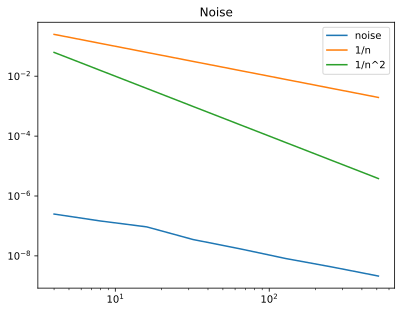

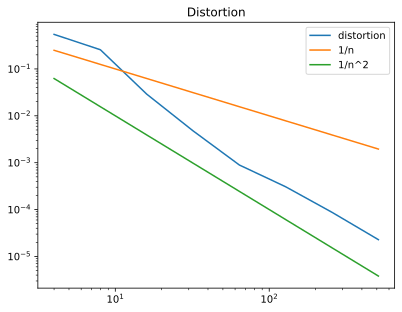

In [15]:

n = np.array([2**i for i in range(2,10)])
plot_noise_distortion(n,0.1)

**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

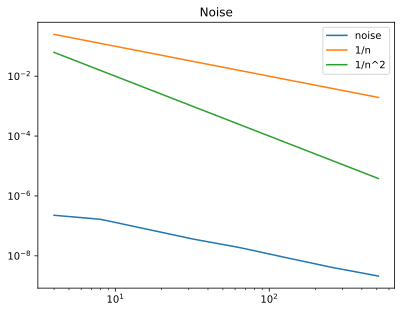

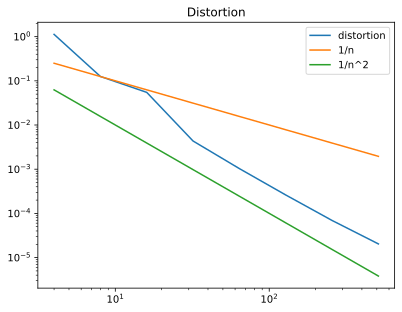

In [16]:
plot_noise_distortion(n,0.01)

**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

Noise dominates very quickly

## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a x intercept $\zeta$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

✍ \<YOUR SOLUTION HERE\>

**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


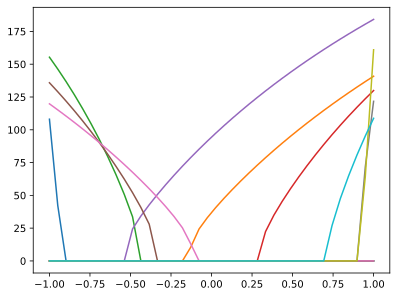

In [17]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)


def generate_activity_lif(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    x = np.array([np.linspace(-1, 1,num_samples) for i in range(num_neurons)])
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.random.uniform(-0.95, 0.95,num_neurons)
    e = np.random.choice([-1, 1],num_neurons)
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1
    alpha = q / (1- zeta)
    J_bias = q * zeta / (zeta - 1)
    encoded_x = x*e.reshape(num_neurons,1)
    A_x = firing(alpha.reshape(num_neurons,1)*encoded_x+ J_bias.reshape(num_neurons,1))
    return A_x, x[0]

A_x,x = generate_activity_lif(10,40)
plt.plot(x,A_x.T)

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

[-2.25796874e-02  4.42153441e-03  2.44330149e-02  6.98013484e-03
  1.13314185e-03  1.15143570e-03  2.46308183e-04 -1.74221170e-05
  8.75953911e-04 -5.18468253e-03 -8.25222364e-03 -1.79315169e-03
  2.43327493e-03  5.00632659e-03 -2.45886733e-03 -3.52601572e-03]


c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


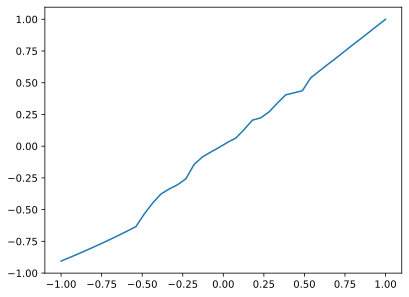

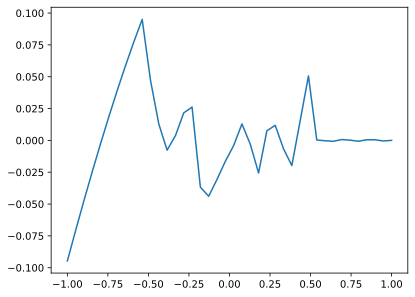

0.03519494594283022


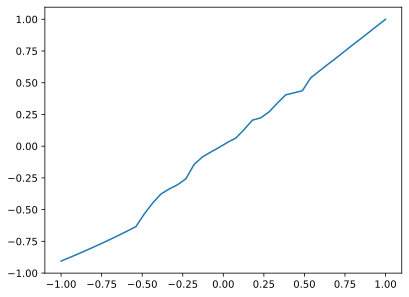

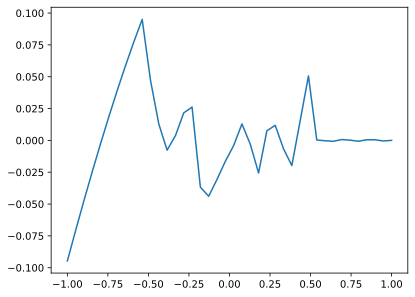

0.03519494594283022


In [18]:
A_x,X = generate_activity_lif(16,40)
D_account,_ = compute_decoder_no_noise(A_x,X,add_noise=False)

print(D_account)
plot_errors_and_rmse(D_account,A_x)
plot_errors_and_rmse(D_account,A_x)

# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

In [19]:

a_max = 100
zeta = [0,0]
def generate_activity_lif_2d(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    x = np.array(np.linspace(-1, 1,num_samples))
    X,Y = np.meshgrid(x,x)
    grid = np.dstack([X,Y]).reshape(1600,2)
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.array([0])
    e = np.array([np.cos(-np.pi/4), np.sin(-np.pi/4)])
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1
    alpha = (q-1) / (1- zeta)
    J_bias = 1- ((q -1) * zeta / (1- zeta))
    encoded_x = grid @ e
    A_x = firing(alpha*encoded_x + J_bias)
    return A_x, grid
num_samples = 40
A_x,grid = generate_activity_lif_2d(1,num_samples)
grid = grid.reshape(2,num_samples,num_samples)




c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 0, 'Z')

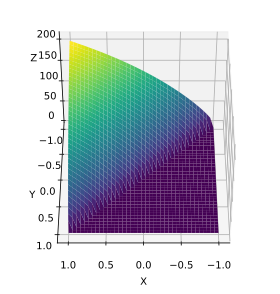

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x= np.linspace(-1, 1,num_samples)
X,Y = np.meshgrid(x,x)
ax.plot_surface(X,Y,A_x.reshape(num_samples,num_samples),cmap='viridis', edgecolor='none')
ax.view_init(elev=45,azim=90)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 0, 'Z')

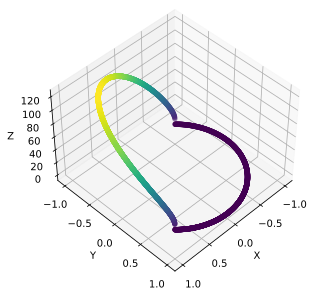

In [21]:

def generate_activity_lif_2d_sample_circle(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    theta = np.array(np.linspace(0, 2*np.pi,num_samples))
    x_val = np.cos(theta)
    y_val = np.sin(theta)
    grid = np.dstack([x_val,y_val]).reshape(-1,2)
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.array([0])
    e = np.array([np.cos(-np.pi/4), np.sin(-np.pi/4)])
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1
    alpha = (q-1) / (1- zeta)
    J_bias = 1- ((q -1) * zeta / (1- zeta))
    encoded_x = grid @ e
    A_x = firing(alpha*encoded_x + J_bias)
    return A_x, x_val,y_val
num_samples = 4000
A_x,x_val,y_val = generate_activity_lif_2d_sample_circle(1,num_samples)
fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(projection='3d')
ax_2.scatter(x_val,y_val,A_x.reshape(num_samples),c=A_x.reshape(num_samples),cmap='viridis')
ax_2.view_init(elev=45,azim=45)

ax_2.set_xlabel('X')
ax_2.set_ylabel('Y')
ax_2.set_zlabel('Z')

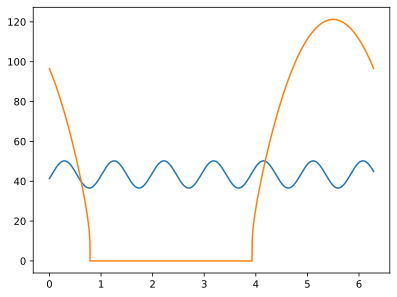

In [22]:
def cos_func(theta,c1,c2,c3,c4):
    return c1*np.cos(c2*theta+c3)+c4
theta = np.array(np.linspace(0, 2*np.pi,num_samples))
popt, _ = scipy.optimize.curve_fit(cos_func,theta,A_x.reshape(num_samples))
plt.plot(theta,cos_func(theta,*popt))
plt.plot(theta,A_x.reshape(num_samples))

**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

A cosine is the ideal choice because it has a maximum at the origin and is symmetric about the origin. It is also periodic similar to the direction encoders. It differs from the ideal curve because it is smooth and does not flatten at 0 and seems to present a negative firing rate.

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

(-1.0, 1.0)

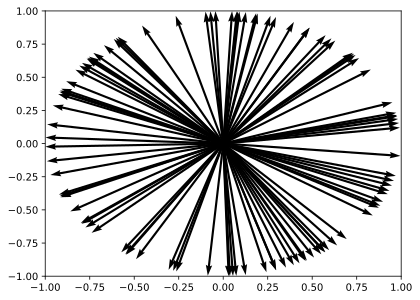

In [23]:
theta = np.random.uniform(0,np.pi*2,100)
x_val_encode = np.cos(theta)
y_val_encode = np.sin(theta)
coords = np.concatenate([x_val_encode.reshape(-1,1),y_val_encode.reshape(-1,1)],axis=1)
origin = np.zeros(x_val_encode.shape)
plt.quiver(origin,origin,x_val_encode,y_val_encode,angles='xy',scale_units='xy',scale=1)
plt.xlim(-1,1)
plt.ylim(-1,1)

**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

In [24]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)

def generate_activity_lif_2d_random_direction(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02,random_scale = False):
    
    
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1
    alpha = (q-1) / (1- zeta)
    J_bias = 1- ((q -1) * zeta / (1- zeta))
    encoded_x = grid @ coords.T
    A_x = firing(alpha*encoded_x + J_bias)
    return A_x, grid



In [25]:

num_neurons = 100
num_samples = 40
x = np.array(np.linspace(-1, 1,num_samples))
X,Y = np.meshgrid(x,x)
grid = np.dstack([X,Y]).reshape(-1,2)
a_max = np.random.uniform(100, 200,num_neurons)
zeta = np.array([0])
theta = np.random.uniform(0,np.pi*2,num_neurons)
x_val = np.cos(theta)
y_val = np.sin(theta)
encoders = np.concatenate([x_val.reshape(-1,1),y_val.reshape(-1,1)],axis=1)
print(grid.shape)
encoders.shape
# A_x,X = generate_activity_lif_2d_random_direction(100,40)


(1600, 2)


(100, 2)

In [26]:

def generate_activity_lif_2d_generic(input,a_max,zeta,encoders,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1

    alpha = (q-1) / (1- zeta)

    J_bias = 1- ((q -1) * zeta / (1- zeta))
    # encoded_x = input @ encoders.T
    encoded_x = np.dot(encoders,input.T).T

    A_x = firing(alpha*encoded_x + J_bias)

    return A_x, input
A_x,X = generate_activity_lif_2d_generic(grid,a_max,zeta,encoders)
A_x.shape

c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(1600, 100)

In [27]:

D_account,_ = compute_decoder_noise(A_x.T,X.T,add_noise=False) #TODO check this


(-0.001, 0.001)

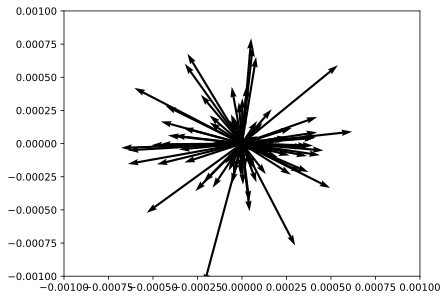

In [28]:

origin = np.zeros(100)
plt.quiver(origin,origin,D_account[0],D_account[1],angles='xy',scale_units='xy',scale=1)
plt.xlim(-0.001,0.001)
plt.ylim(-0.001,0.001)

**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

The decoding vectors are much smaller than the encoding vectors because they are trying to optimize to be equal to the input vectors after a series of dot product operations that increase the magnitude of the activity vector.

**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


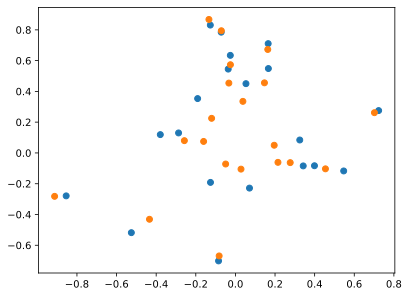

0.07264822676236793

In [29]:
radius = np.random.uniform(0,1,20)
theta_i = np.random.uniform(0,np.pi*2,20)
x_val_i = radius*np.cos(theta_i)
y_val_i = radius*np.sin(theta_i)
coords_input = np.concatenate([x_val_i.reshape(-1,1),y_val_i.reshape(-1,1)],axis=1)

A_x,_ = generate_activity_lif_2d_generic(coords_input,a_max,zeta,encoders)

decoded = (A_x@D_account.T)
# decoded = D_account@A_x.T

plt.scatter(decoded[:,0],decoded[:,1])
plt.scatter(coords_input[:,0],coords_input[:,1])
plt.show()

rmse = np.sqrt(np.mean((decoded.reshape(1,-1)-coords_input.reshape(1,-1))**2))
rmse

**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

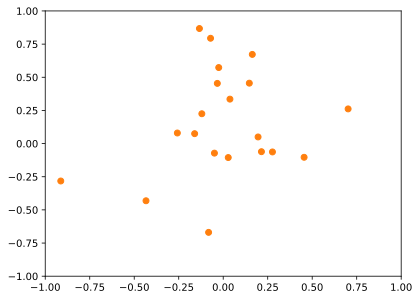

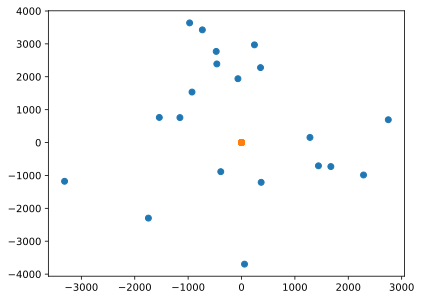

1767.616845505255
0.2246865415506612


In [30]:
undecoded = (A_x @ encoders)

plt.scatter(undecoded[:,0],undecoded[:,1])
plt.scatter(coords_input[:,0],coords_input[:,1])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

plt.scatter(undecoded[:,0],undecoded[:,1])
plt.scatter(coords_input[:,0],coords_input[:,1])
plt.show()

rmse = np.sqrt(np.mean((undecoded.reshape(1,-1)-coords_input.reshape(1,-1))**2))
print(rmse)
normalized_undecoded = undecoded / np.sqrt(np.sum(undecoded**2))
rmse = np.sqrt(np.mean((normalized_undecoded.reshape(1,-1)-coords_input.reshape(1,-1))**2))
print(rmse)



**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

The RMSE on the decoded normalized vectors is smaller than expected. This could be because when normalizing to account for magnitude there is still a lot of information preserved in the relative direction of the encoders. Decoding activity with the encoders still results in good results because a high activation signal in the direction of an encoder likely indicates it is the preferred direction.